In [40]:
import pandas as pd
import numpy as np
from charset_normalizer import from_path
import glob
import matplotlib.pyplot as plt

In [3]:
csv_path = glob.glob("data/*.csv")
print("CSV file path:", csv_path)

best_enc = from_path(csv_path[0]).best().encoding
print("Suggested encoding:", best_enc)

CSV file path: ['data\\Houses.csv']
Suggested encoding: cp1250


In [4]:
house_data = pd.read_csv(csv_path[0], encoding=best_enc)
house_data.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [73]:
wwa_data = house_data[house_data.city == 'Warszawa'].copy()
print("Shape:", wwa_data.shape)
print(wwa_data.columns)
wwa_data.head()

Shape: (9851, 11)
Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')


,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.0,6.0,280.00,2003.0
8,8,Ursynów Wyżyny,Warszawa,3.0,11387.0,52.140282,21.056345,615000.0,4.0,63.40,1982.0
9,9,Bemowo,Warszawa,1.0,10904.0,52.238974,20.913288,429000.0,1.0,40.00,1999.0


In [74]:
wwa_data = wwa_data.drop(columns=['Unnamed: 0', 'address', 'city', 'id', 'latitude', 'longitude', 'floor'], errors='ignore')
wwa_data.head()

,price,rooms,sq,year
1,240548.0,1.0,24.38,2021.0
4,996000.0,5.0,105.00,2020.0
7,2890000.0,6.0,280.00,2003.0
8,615000.0,4.0,63.40,1982.0
9,429000.0,1.0,40.00,1999.0


In [75]:
wwa_data.sort_values(by='price').head()

,price,rooms,sq,year
10084,5000.0,2.0,50.00,2009.0
19489,150000.0,1.0,36.00,2007.0
8711,161000.0,1.0,14.60,2018.0
19669,165000.0,1.0,14.62,2018.0
2103,169000.0,1.0,14.63,2018.0


In [76]:
for col in wwa_data.columns:
    print(wwa_data.sort_values(by=col).head(), '\n')

          price  rooms     sq    year
10084    5000.0    2.0  50.00  2009.0
19489  150000.0    1.0  36.00  2007.0
8711   161000.0    1.0  14.60  2018.0
19669  165000.0    1.0  14.62  2018.0
2103   169000.0    1.0  14.63  2018.0 

          price  rooms     sq    year
1      240548.0    1.0  24.38  2021.0
4090   289700.0    1.0  20.19  1956.0
4082   580000.0    1.0  34.00  2020.0
16241  539000.0    1.0  36.00  2020.0
16295  335000.0    1.0  18.00  2021.0 

           price  rooms     sq    year
1349   1220000.0    4.0   8.80  2019.0
19580   225000.0    1.0  11.00  1968.0
6847    215000.0    1.0  11.74  1961.0
1749    217000.0    1.0  12.80  1936.0
8711    161000.0    1.0  14.60  2018.0 

          price  rooms    sq    year
1032   760000.0    3.0  53.0    75.0
4513   320000.0    1.0  28.0    80.0
10408  450000.0    2.0  47.8    81.0
22999  660000.0    3.0  59.0   214.0
20605  350000.0    1.0  21.0  1070.0 



In [77]:
wwa_data = wwa_data[(wwa_data.price > 100000.0) & (wwa_data.sq > 15.0) & (7000000.0 > wwa_data.price) & (325.0 > wwa_data.sq)]
wwa_data.describe()

,price,rooms,sq,year
count,9.822000e+03,9822.000000,9822.000000,9822.000000
mean,7.658573e+05,2.624211,61.460767,1996.052637
std,6.049138e+05,1.007151,30.516667,49.670981
min,1.500000e+05,1.000000,15.330000,75.000000
25%,4.650000e+05,2.000000,43.000000,1975.000000
50%,5.950000e+05,3.000000,54.200000,2008.000000
75%,8.200000e+05,3.000000,70.300000,2020.000000
max,6.900000e+06,10.000000,313.180000,2980.000000


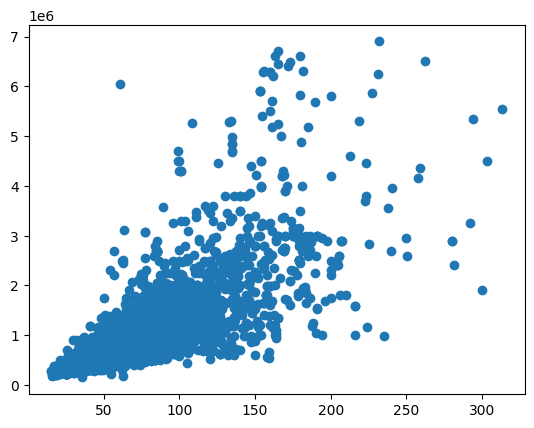

In [78]:
plt.scatter(x = wwa_data.sq, y = wwa_data.price)
plt.show()

In [79]:
wwa_data['price_per_m2'] = wwa_data['price'] / wwa_data['sq']
wwa_data = wwa_data[(wwa_data['price_per_m2'] > 5000.0) & (wwa_data['price_per_m2'] < 45000.0)]
wwa_data.describe()

,price,rooms,sq,year,price_per_m2
count,9.798000e+03,9798.000000,9798.000000,9798.000000,9798.000000
mean,7.640306e+05,2.621351,61.326042,1996.016126,12165.381782
std,5.981468e+05,1.003882,30.333965,49.719983,3870.252100
min,1.770000e+05,1.000000,15.330000,75.000000,5149.484536
25%,4.650000e+05,2.000000,42.965000,1975.000000,9744.501098
50%,5.950000e+05,3.000000,54.000000,2008.000000,11517.725560
75%,8.200000e+05,3.000000,70.260000,2020.000000,13585.714286
max,6.900000e+06,10.000000,313.180000,2980.000000,44900.000000


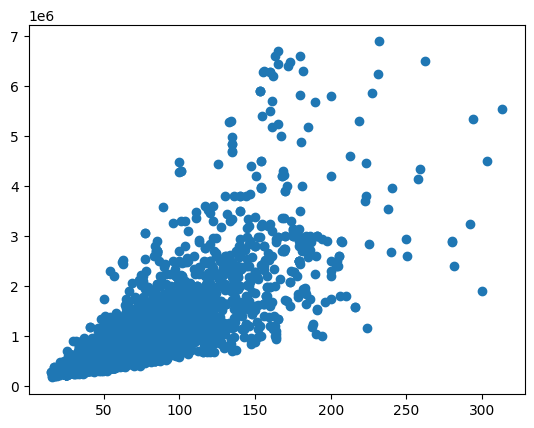

In [87]:
plt.scatter(x = wwa_data.sq, y = wwa_data.price)
plt.show()

In [81]:
wwa_data['year'] = 2026.0 - wwa_data['year']
wwa_data.rename(columns={'year': 'age'}, inplace=True)

In [84]:
wwa_data = wwa_data.drop(columns=['price_per_m2'])
wwa_data.head()

,price,rooms,sq,age
1,240548.0,1.0,24.38,5.0
4,996000.0,5.0,105.00,6.0
7,2890000.0,6.0,280.00,23.0
8,615000.0,4.0,63.40,44.0
9,429000.0,1.0,40.00,27.0


In [86]:
wwa_data.shape

(9798, 4)